In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
)

In [14]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    print(f'Train: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)
    print(f'Test: {mean_squared_error(y_test, test_prediction)}')

def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [15]:
def get_error_plot(n_trees, max_depth, eta, X_train, X_test, y_train, y_test):

    plt.figure(figsize=(25,7))
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.ylim(0, 30000)

    x = list(range(n_trees))

    print(f'n_trees={n_trees} max_depth={max_depth}')
    for eta_ in eta:
        print(f'\neta={eta_}')

        coefs = [1] * n_trees

        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta_)
        evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta_)

        plt.plot(x, train_errors, label=f'eta={eta_}')
        plt.plot(x, test_errors, label=f'meta={eta_}')

    plt.legend()
    plt.show()

n_trees=10 max_depth=3

eta=0.01
Train: 25271.16974896795
Test: 21207.748077398628

eta=0.1
Train: 5897.051310760682
Test: 5160.973441468047

eta=1
Train: 980.3863233936032
Test: 4487.431635691393


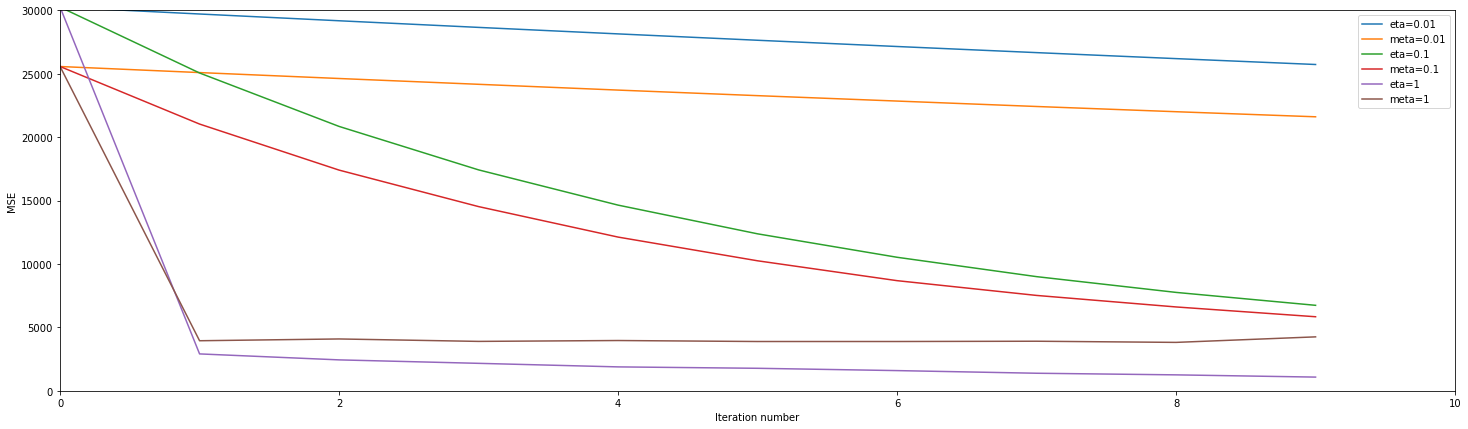

In [16]:
get_error_plot(10, 3, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=10 max_depth=5

eta=0.01
Train: 25084.315716261513
Test: 21253.275143686955

eta=0.1
Train: 4900.905116510333
Test: 5298.878446942118

eta=1
Train: 104.85489640535943
Test: 4806.2383550914665


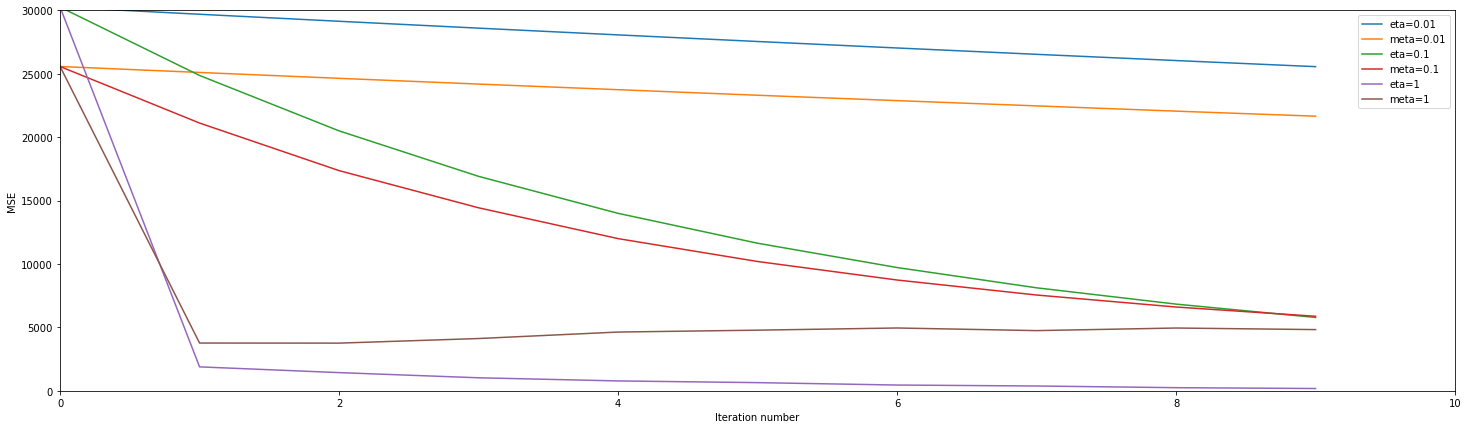

In [17]:
get_error_plot(10, 5, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=10 max_depth=10

eta=0.01
Train: 24789.636207978743
Test: 21224.332672559685

eta=0.1
Train: 3800.6571499222837
Test: 5357.880869026502

eta=1
Train: 2.2874321793419358e-08
Test: 5085.922427215554


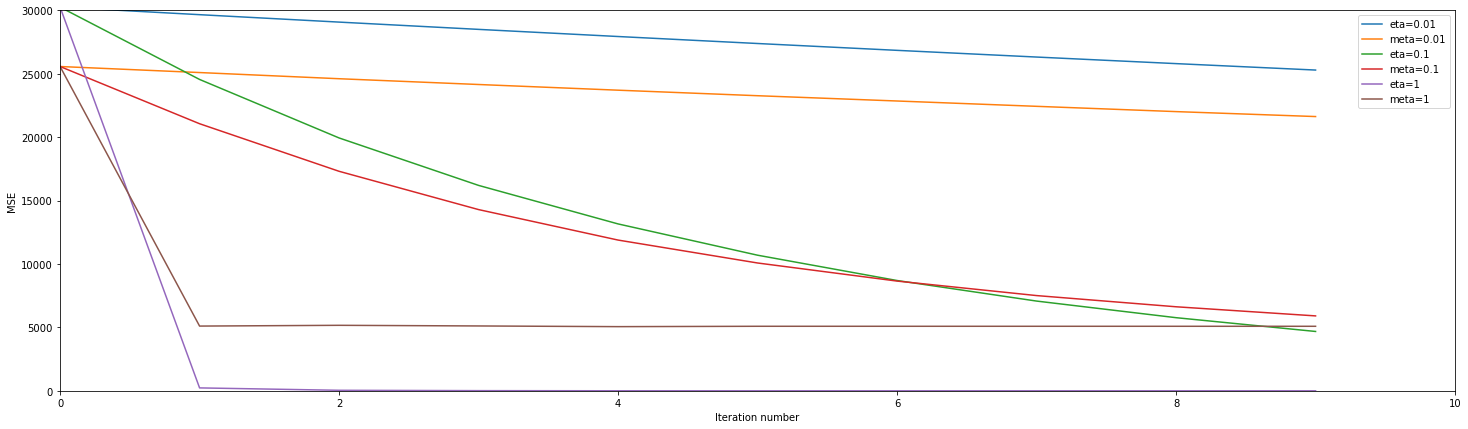

In [18]:
get_error_plot(10, 10, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

### При n_trees=10 и увеличении max_depth видно, что происходит переобучение модели

### Увеличим n_trees до 25

n_trees=25 max_depth=3

eta=0.01
Train: 19435.64151076987
Test: 16173.452613018888

eta=0.1
Train: 2025.7673449113324
Test: 2987.9530416250623

eta=1
Train: 313.2061701791559
Test: 4745.9093123463745


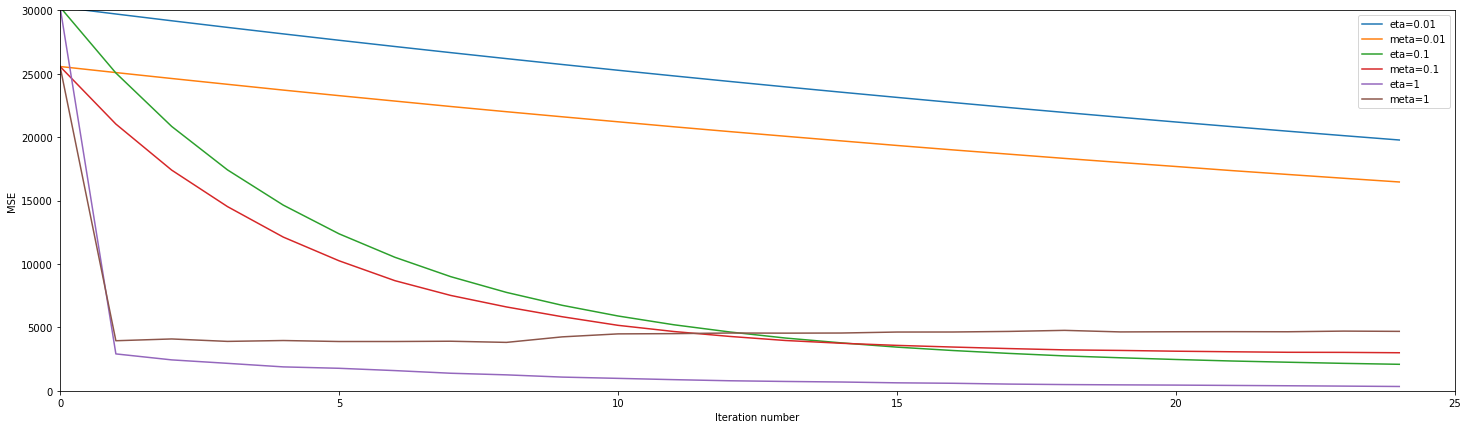

In [19]:
get_error_plot(25, 3, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=25 max_depth=5

eta=0.01
Train: 19030.19468413716
Test: 16143.864267927134

eta=0.1
Train: 858.8591962661376
Test: 3145.606119850078

eta=1
Train: 1.875349026762375
Test: 4951.814608333606


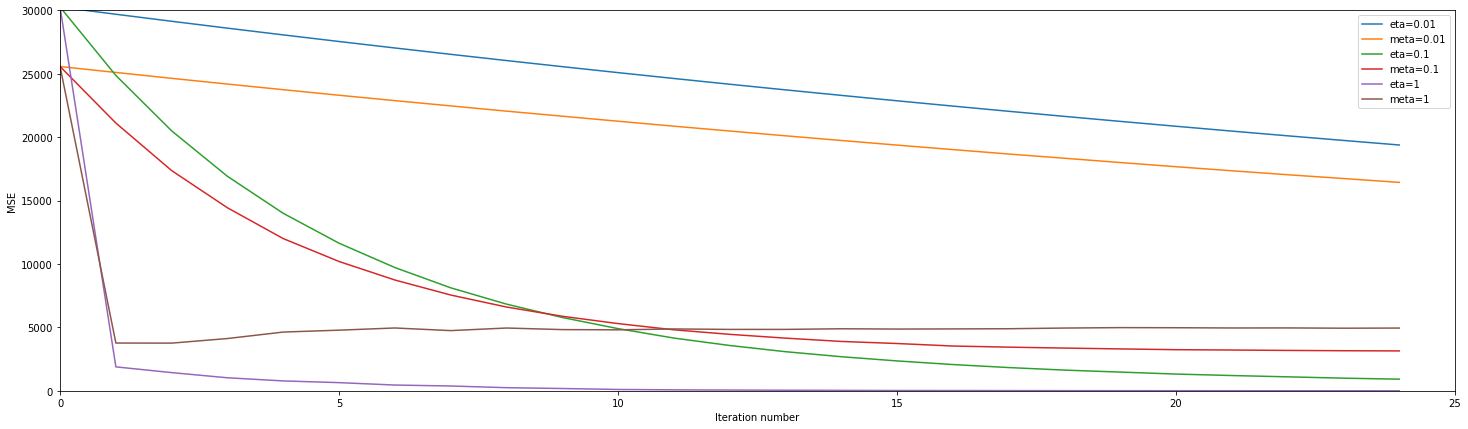

In [20]:
get_error_plot(25, 5, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=25 max_depth=10

eta=0.01
Train: 18402.727735499724
Test: 16207.4246362429

eta=0.1
Train: 165.5147269102797
Test: 3382.3957401462476

eta=1
Train: 6.0369832958006004e-27
Test: 5085.922224458764


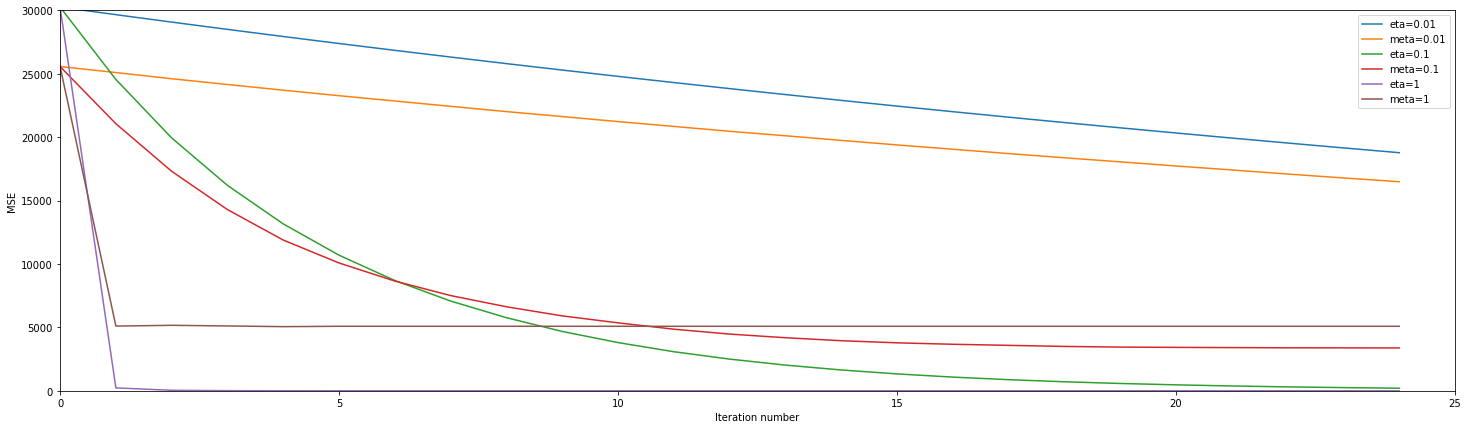

In [22]:
get_error_plot(25, 10, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

### При n_trees=25 и увеличении max_depth также видно, что происходит переобучение модели

### Лучшие показатели с параметрами
* n_trees=25
* max_depth=3
* eta=0.1

Train: 2025.7673449113324

Test: 2987.9530416250623

Наименьший показатель MSE на тестовой выборке плюс умеренное переобучение.